In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import random
from sklearn.cluster import KMeans
from sklearn.preprocessing import MinMaxScaler
from sklearn import metrics
import seaborn as sns 

In [2]:
import pandas as pd
import numpy as np
#1. Reading & displaying the data 
import pandas as pd
df = pd.read_csv('data2.csv', delimiter = ',')
display(df)

,0,neuroticism_scores,extroversion_scores,openness_scores,agreeableness_scores,conscientiousness_scores
0,1,20.84,51.96,45.72,45.53,34.60
1,2,22.39,54.07,55.71,41.56,44.16
2,3,23.75,57.80,42.42,65.82,49.34
3,4,9.70,45.27,44.58,58.71,40.88
4,5,11.85,44.53,46.97,40.71,47.39
...,...,...,...,...,...,...
95,96,13.79,41.46,38.77,59.79,41.17
96,97,24.53,55.03,45.86,50.61,31.78
97,98,31.30,56.55,49.66,58.17,45.59
98,99,20.70,39.71,38.69,47.48,39.68


In [3]:
## WE WILL assighn each 5 people in a team randomly,

num_teams = 20
num_people_per_team = 5
team_numbers = np.random.randint(1, num_teams + 1, size=len(df))
df['Team number'] = team_numbers

# Print the first few rows to check the result
print(df.head())

   0  neuroticism_scores  extroversion_scores  openness_scores   
0  1               20.84                51.96            45.72  \
1  2               22.39                54.07            55.71   
2  3               23.75                57.80            42.42   
3  4                9.70                45.27            44.58   
4  5               11.85                44.53            46.97   

   agreeableness_scores  conscientiousness_scores  Team number  
0                 45.53                     34.60           13  
1                 41.56                     44.16            6  
2                 65.82                     49.34            4  
3                 58.71                     40.88           18  
4                 40.71                     47.39            2  


In [4]:
df = df.drop(df.columns[0], axis=1)
display(df.head(5))
display(df.info())
df["Team number"]

,neuroticism_scores,extroversion_scores,openness_scores,agreeableness_scores,conscientiousness_scores,Team number
0,20.84,51.96,45.72,45.53,34.60,13
1,22.39,54.07,55.71,41.56,44.16,6
2,23.75,57.80,42.42,65.82,49.34,4
3,9.70,45.27,44.58,58.71,40.88,18
4,11.85,44.53,46.97,40.71,47.39,2


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 6 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   neuroticism_scores        100 non-null    float64
 1   extroversion_scores       100 non-null    float64
 2   openness_scores           100 non-null    float64
 3   agreeableness_scores      100 non-null    float64
 4   conscientiousness_scores  100 non-null    float64
 5   Team number               100 non-null    int32  
dtypes: float64(5), int32(1)
memory usage: 4.4 KB


None

0     13
1      6
2      4
3     18
4      2
      ..
95    15
96    18
97     3
98     2
99     9
Name: Team number, Length: 100, dtype: int32

In [5]:
target_average = 70  # You can specify the desired average score

# Function to generate team scores with the desired average
def generate_team_score(target_average, team_size):
    total = target_average * team_size
    min_score = max(0, total - 100 * (team_size - 1))
    max_score = min(100, total)
    return random.randint(min_score, max_score)

# Create a new column with team scores
team_scores = {}
for team_number, team_data in df.groupby('Team number'):
    team_size = len(team_data)
    team_scores[team_number] = generate_team_score(target_average, team_size)

df['Team Score'] = df['Team number'].map(team_scores)

In [6]:
df


,neuroticism_scores,extroversion_scores,openness_scores,agreeableness_scores,conscientiousness_scores,Team number,Team Score
0,20.84,51.96,45.72,45.53,34.60,13,68
1,22.39,54.07,55.71,41.56,44.16,6,1
2,23.75,57.80,42.42,65.82,49.34,4,82
3,9.70,45.27,44.58,58.71,40.88,18,63
4,11.85,44.53,46.97,40.71,47.39,2,99
...,...,...,...,...,...,...,...
95,13.79,41.46,38.77,59.79,41.17,15,31
96,24.53,55.03,45.86,50.61,31.78,18,63
97,31.30,56.55,49.66,58.17,45.59,3,50
98,20.70,39.71,38.69,47.48,39.68,2,99


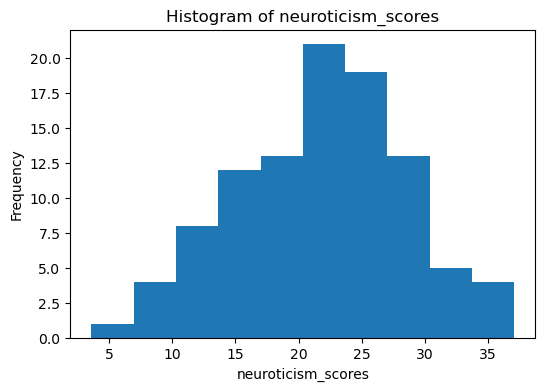

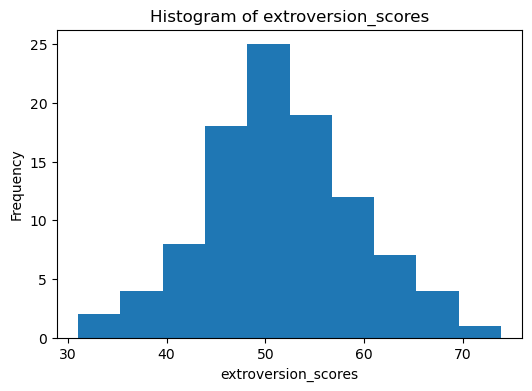

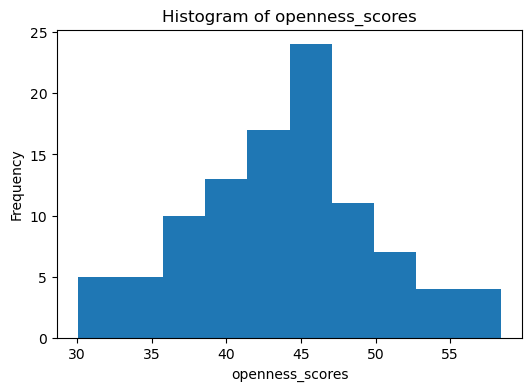

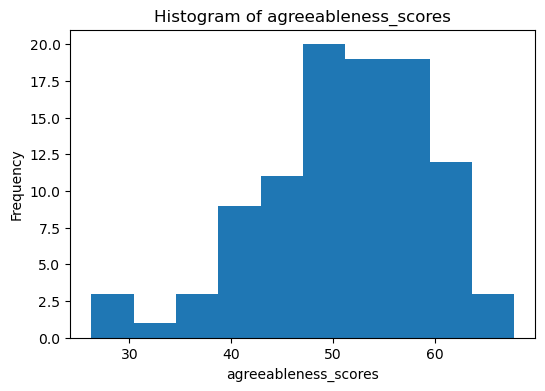

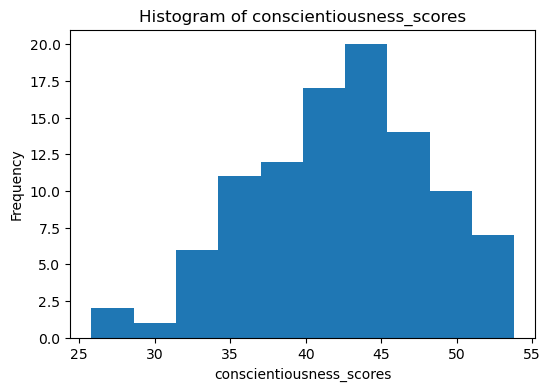

In [7]:

numerical_cols = df.select_dtypes(include=['number']).drop(columns={'Team number',"Team Score"}).columns
categorical_cols = df.select_dtypes(exclude=['number']).columns

# Visualize statistics for numerical columns
for col in numerical_cols:
    plt.figure(figsize=(6, 4))
    df[col].plot(kind='hist', title=f'Histogram of {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')
    plt.show()

# Visualize statistics for categorical columns
for col in categorical_cols:
    plt.figure(figsize=(6, 4))
    df[col].value_counts().plot(kind='bar', title=f'Bar plot of {col}')
    plt.xlabel(col)
    plt.ylabel('Count')
    plt.show()






In [8]:
# Calculate mean and standard deviation for each BIG 5 score
mean_neuroticism = df['neuroticism_scores'].mean()
std_neuroticism = df['neuroticism_scores'].std()

mean_extroversion = df['extroversion_scores'].mean()
std_extroversion = df['extroversion_scores'].std()

mean_openness = df['openness_scores'].mean()
std_openness = df['openness_scores'].std()

mean_agreeableness = df['agreeableness_scores'].mean()
std_agreeableness = df['agreeableness_scores'].std()

mean_conscientiousness = df['conscientiousness_scores'].mean()
std_conscientiousness = df['conscientiousness_scores'].std()

# Print the statistics
print(f"Neuroticism - Mean: {mean_neuroticism}, Std Dev: {std_neuroticism}")
print(f"Extroversion - Mean: {mean_extroversion}, Std Dev: {std_extroversion}")
print(f"Openness - Mean: {mean_openness}, Std Dev: {std_openness}")
print(f"Agreeableness - Mean: {mean_agreeableness}, Std Dev: {std_agreeableness}")
print(f"Conscientiousness - Mean: {mean_conscientiousness}, Std Dev: {std_conscientiousness}")


Neuroticism - Mean: 21.74470000000001, Std Dev: 6.891302152977794
Extroversion - Mean: 51.44660000000001, Std Dev: 7.865300500273079
Openness - Mean: 43.85029999999999, Std Dev: 6.024461995343097
Agreeableness - Mean: 51.11589999999999, Std Dev: 8.316578926481972
Conscientiousness - Mean: 42.317800000000005, Std Dev: 5.839734423877009


C:\Users\jaffe\anaconda3\envs\my_env\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\jaffe\anaconda3\envs\my_env\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\jaffe\anaconda3\envs\my_env\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\jaffe\anaconda3\envs\my_env\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning:

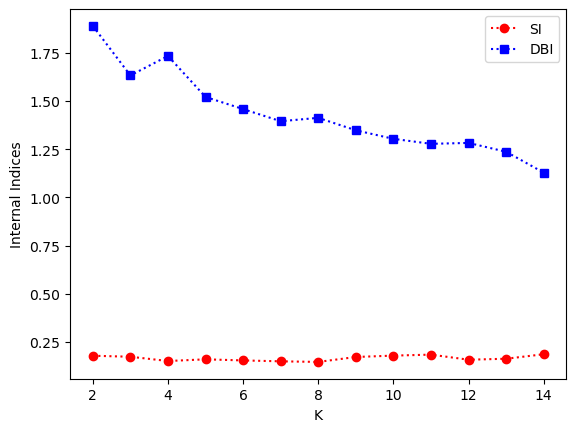

In [9]:
from sklearn.preprocessing import MinMaxScaler
from sklearn import metrics

# Set possible values for K
k_vals=range(2,15)

# Empty arrays for internal measures
sShil_max = np.empty([len(k_vals),1])
sDaBo_min = np.empty_like(sShil_max)

for i,n in enumerate(k_vals):
    kmeans = KMeans(n_clusters=n, max_iter=1000, n_init=10, random_state=0).fit(df[numerical_cols])
    sShil_max[i] = metrics.silhouette_score(df[numerical_cols],kmeans.labels_)
    sDaBo_min[i] = metrics.davies_bouldin_score(df[numerical_cols],kmeans.labels_) 
    
plt.plot(k_vals, sShil_max, 'o:',c='r')
plt.plot(k_vals, sDaBo_min, 's:',c='b')
plt.xlabel("K")
plt.ylabel("Internal Indices")
plt.legend(['SI','DBI'])
plt.show()

C:\Users\jaffe\anaconda3\envs\my_env\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\jaffe\anaconda3\envs\my_env\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


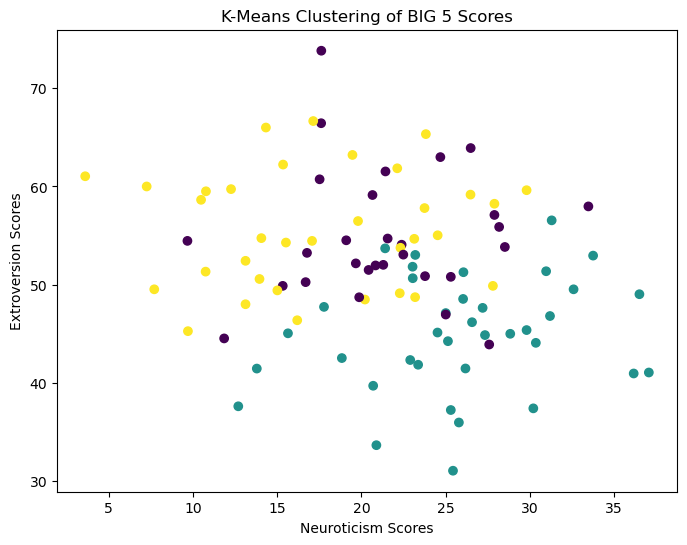

    neuroticism_scores  extroversion_scores  openness_scores   
0                20.84                51.96            45.72  \
1                22.39                54.07            55.71   
2                23.75                57.80            42.42   
3                 9.70                45.27            44.58   
4                11.85                44.53            46.97   
..                 ...                  ...              ...   
95               13.79                41.46            38.77   
96               24.53                55.03            45.86   
97               31.30                56.55            49.66   
98               20.70                39.71            38.69   
99               21.30                52.02            50.26   

    agreeableness_scores  conscientiousness_scores  Team number  Team Score   
0                  45.53                     34.60           13          68  \
1                  41.56                     44.16            6          

In [10]:


# Specify the number of clusters (k=3)
kmeans = KMeans(n_clusters=3)

# Fit the k-means model to the BIG 5 scores
kmeans.fit(df[['neuroticism_scores', 'extroversion_scores', 'openness_scores', 'agreeableness_scores', 'conscientiousness_scores']])

# Add cluster labels to the DataFrame
df['cluster'] = kmeans.labels_

# Visualize the clusters
plt.figure(figsize=(8, 6))
plt.scatter(df['neuroticism_scores'], df['extroversion_scores'], c=df['cluster'], cmap='viridis')
plt.xlabel('Neuroticism Scores')
plt.ylabel('Extroversion Scores')
plt.title('K-Means Clustering of BIG 5 Scores')
plt.show()

# Display the DataFrame with cluster labels
print(df)

In [11]:
df

,neuroticism_scores,extroversion_scores,openness_scores,agreeableness_scores,conscientiousness_scores,Team number,Team Score,cluster
0,20.84,51.96,45.72,45.53,34.60,13,68,0
1,22.39,54.07,55.71,41.56,44.16,6,1,0
2,23.75,57.80,42.42,65.82,49.34,4,82,2
3,9.70,45.27,44.58,58.71,40.88,18,63,2
4,11.85,44.53,46.97,40.71,47.39,2,99,0
...,...,...,...,...,...,...,...,...
95,13.79,41.46,38.77,59.79,41.17,15,31,1
96,24.53,55.03,45.86,50.61,31.78,18,63,2
97,31.30,56.55,49.66,58.17,45.59,3,50,1
98,20.70,39.71,38.69,47.48,39.68,2,99,1


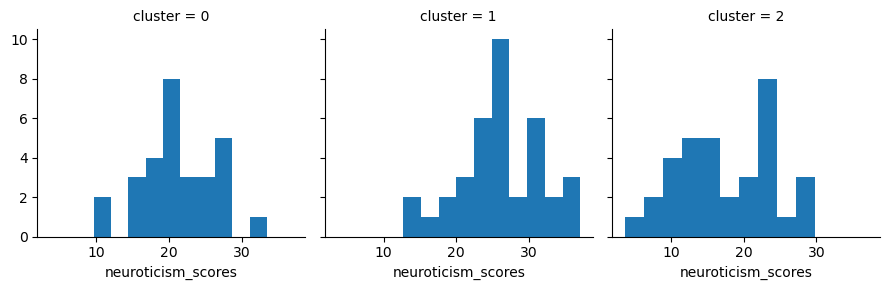

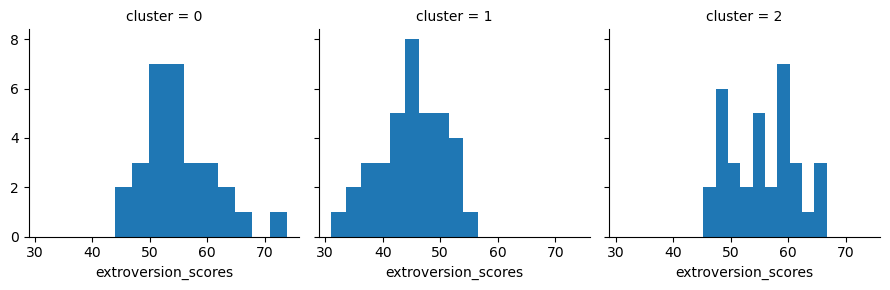

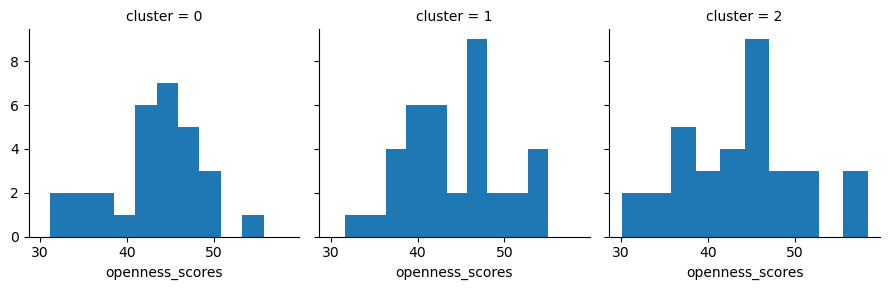

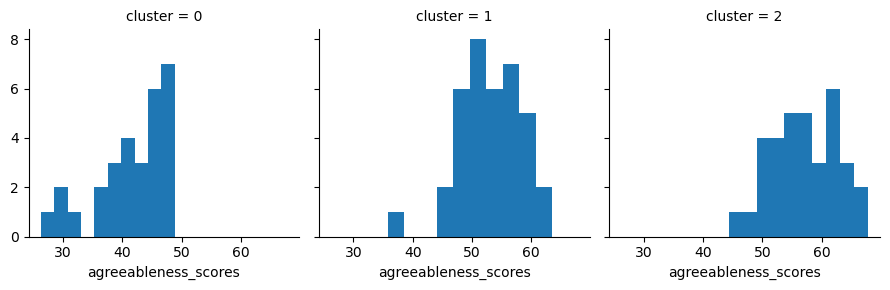

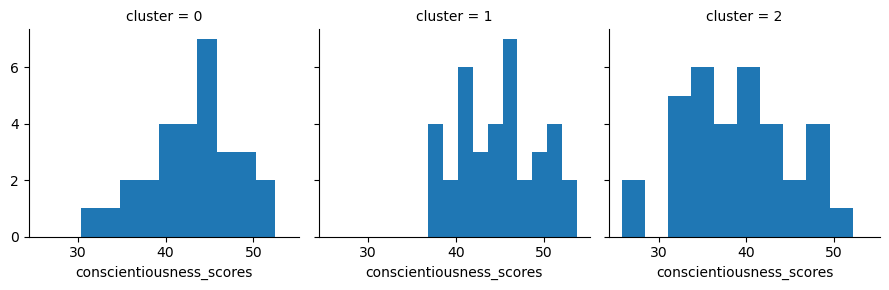

In [12]:
for c in df[numerical_cols]:
    grid= sns.FacetGrid(df, col='cluster')
    grid.map(plt.hist, c)

<Figure size 640x480 with 0 Axes>

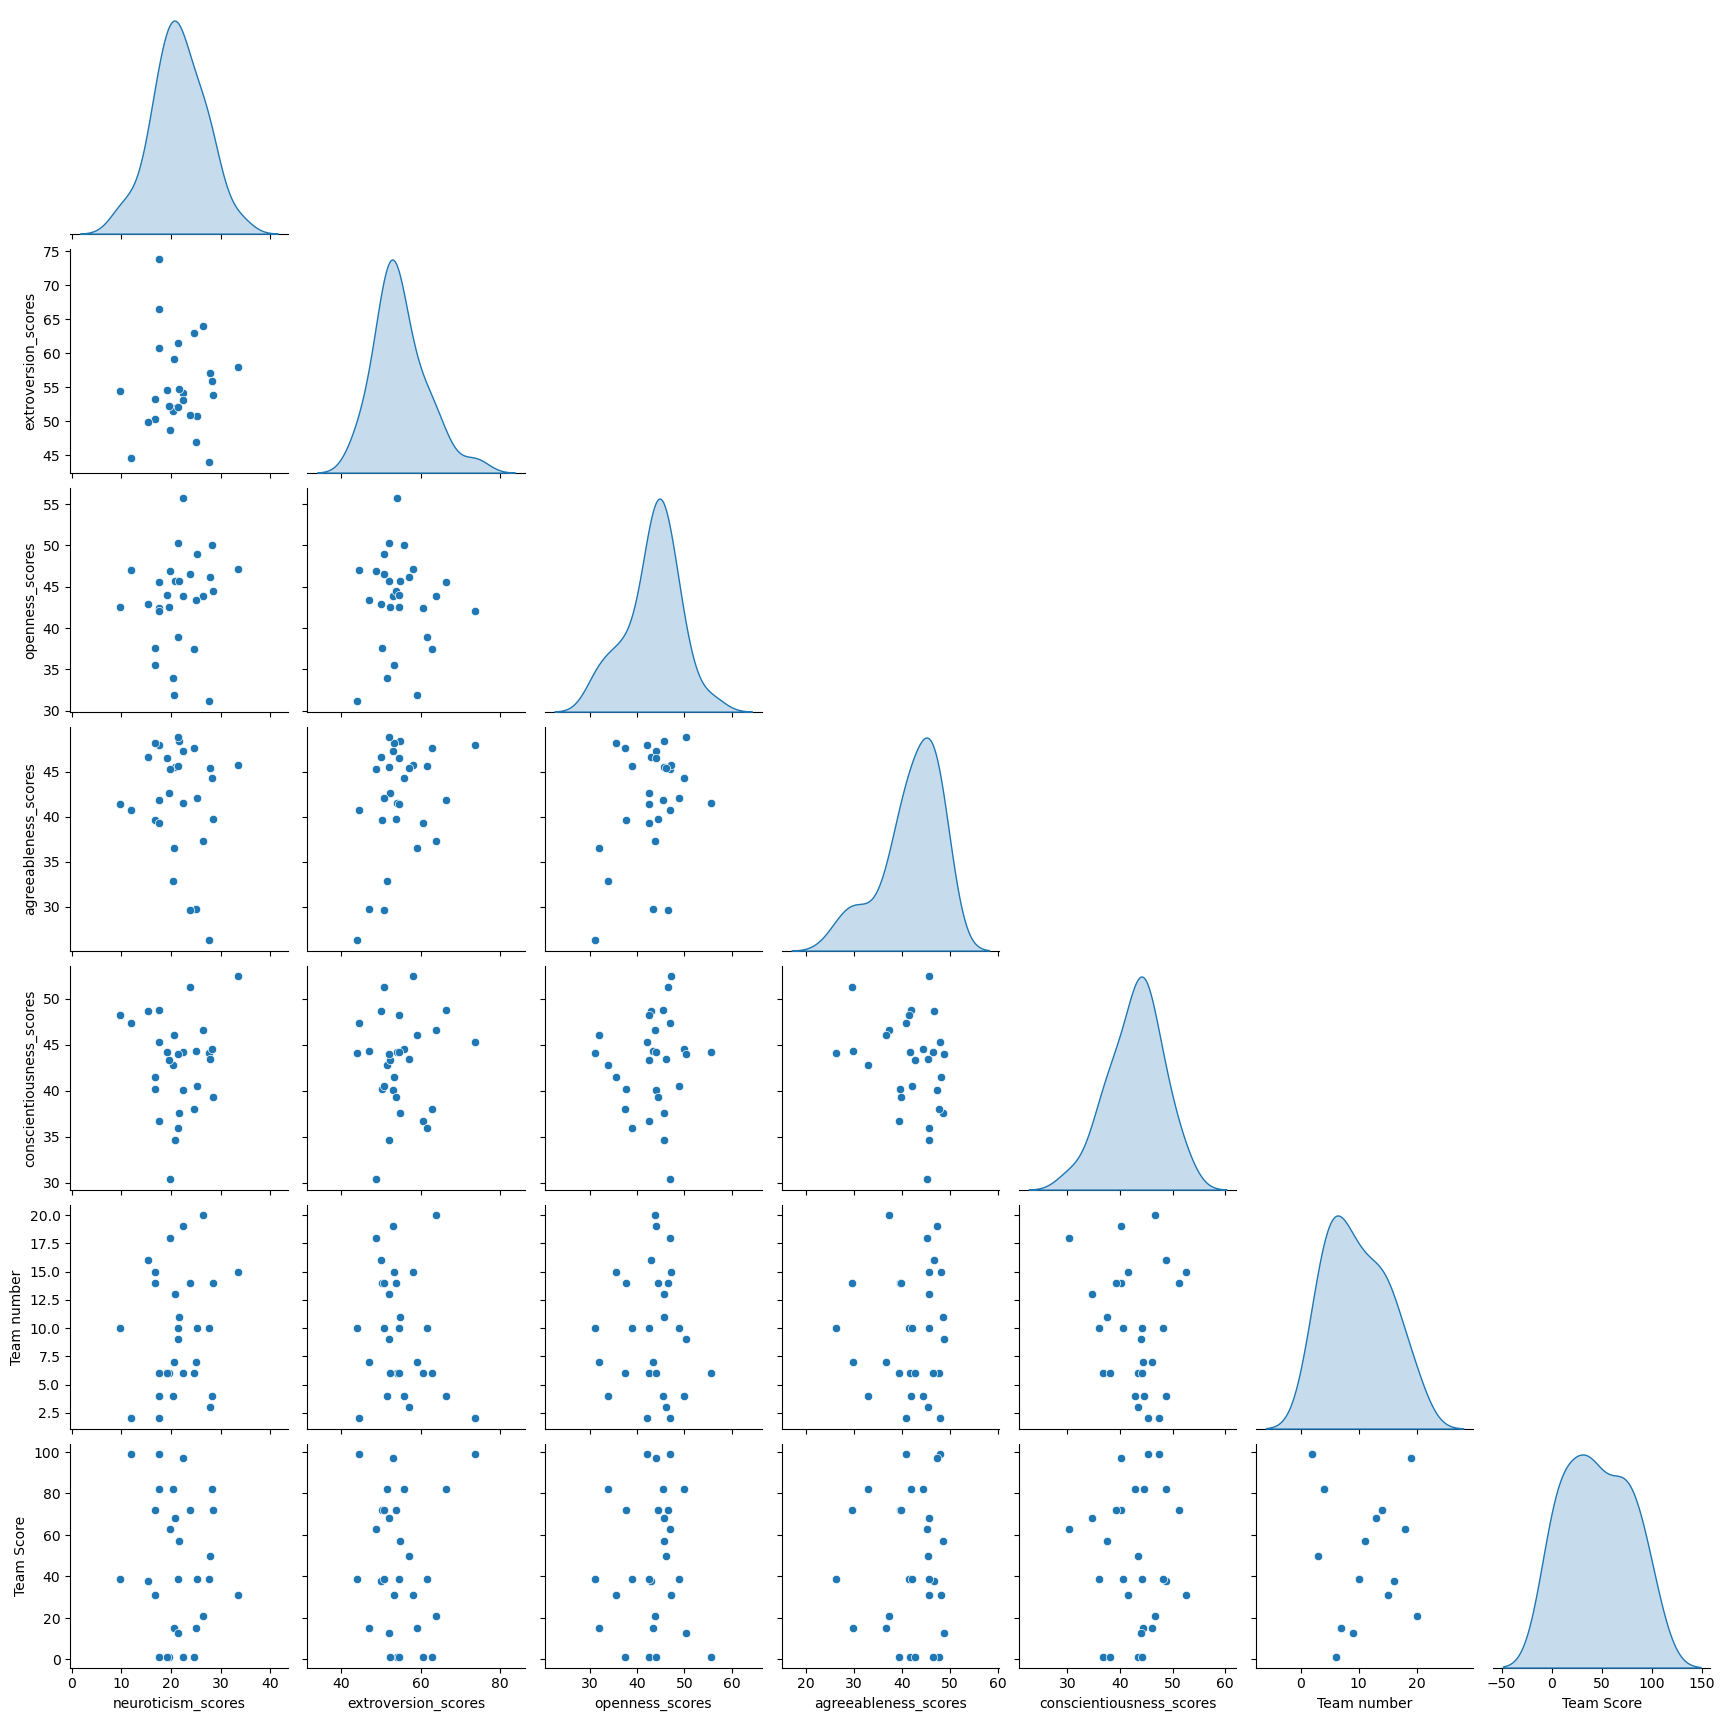

In [13]:
plt.figure()
sns.pairplot(vars=df.columns.drop('cluster'), 
             corner=True,diag_kind='kde',
             data=df[df['cluster']==0])
plt.show()

In [14]:
cluster0_data = df[df['cluster'] == 0]
cluster1_data = df[df['cluster'] == 1]
cluster2_data = df[df['cluster'] == 2]

In [15]:
cluster0_descriptive_stats = cluster0_data.describe()
cluster1_descriptive_stats = cluster1_data.describe()
cluster2_descriptive_stats = cluster2_data.describe()

# Print the descriptive statistics
print("Cluster 0 Descriptive Statistics:")
print(cluster0_descriptive_stats)
print("\nCluster 1 Descriptive Statistics:")
print(cluster1_descriptive_stats)
print("\nCluster 2 Descriptive Statistics:")
print(cluster2_descriptive_stats)

Cluster 0 Descriptive Statistics:
       neuroticism_scores  extroversion_scores  openness_scores   
count           29.000000            29.000000        29.000000  \
mean            21.508621            54.861034        43.237241   
std              5.213748             6.553087         5.592231   
min              9.670000            43.910000        31.110000   
25%             17.620000            50.870000        42.020000   
50%             21.300000            53.840000        43.910000   
75%             25.010000            57.970000        46.540000   
max             33.480000            73.820000        55.710000   

       agreeableness_scores  conscientiousness_scores  Team number   
count             29.000000                 29.000000    29.000000  \
mean              41.882414                 42.908966     9.689655   
std                6.079253                  5.066014     5.244749   
min               26.270000                 30.370000     2.000000   
25%         

In [16]:
cluster0_mean_std = cluster0_data.describe(include='all').loc[['mean', 'std']].round(2)
cluster1_mean_std = cluster1_data.describe(include='all').loc[['mean', 'std']].round(2)
cluster2_mean_std = cluster2_data.describe(include='all').loc[['mean', 'std']].round(2)

# Print the mean and standard deviation for each cluster
print("Cluster 0 Mean and Standard Deviation:")
print(cluster0_mean_std)
print("\nCluster 1 Mean and Standard Deviation:")
print(cluster1_mean_std)
print("\nCluster 2 Mean and Standard Deviation:")
print(cluster2_mean_std)

Cluster 0 Mean and Standard Deviation:
      neuroticism_scores  extroversion_scores  openness_scores   
mean               21.51                54.86            43.24  \
std                 5.21                 6.55             5.59   

      agreeableness_scores  conscientiousness_scores  Team number  Team Score   
mean                 41.88                     42.91         9.69       45.52  \
std                   6.08                      5.07         5.24       32.46   

      cluster  
mean      0.0  
std       0.0  

Cluster 1 Mean and Standard Deviation:
      neuroticism_scores  extroversion_scores  openness_scores   
mean               25.86                44.92            44.33  \
std                 5.91                 5.90             5.74   

      agreeableness_scores  conscientiousness_scores  Team number  Team Score   
mean                 52.98                     44.80        11.11       48.97  \
std                   5.34                      4.54         5.44    

In [17]:
summery = pd.DataFrame([
    {'neuroticism_scores': 26.62, 'extroversion_scores': 43.90, 'openness_scores': 43.79, 'agreeableness_scores': 52.87, 'conscientiousness_scores': 45.03,  'Team Score': 60.61, 'cluster': 0},
    {'neuroticism_scores': 19.86, 'extroversion_scores': 54.78, 'openness_scores': 43.39, 'agreeableness_scores': 42.97, 'conscientiousness_scores': 42.87, 'Team Score': 50.20, 'cluster': 1},
    {'neuroticism_scores': 19.23, 'extroversion_scores': 54.89, 'openness_scores': 44.38, 'agreeableness_scores': 57.90, 'conscientiousness_scores': 39.27, 'Team Score': 59.32, 'cluster': 2}
])


summery
## Focus in Opennness and agreeableness and conscientious only
# Go the highest one of the the 3 it is for cluster 2 in agreeplness he is claabrator 
# cluster 0 is Executor 
# cluster 1 is innovator 

,neuroticism_scores,extroversion_scores,openness_scores,agreeableness_scores,conscientiousness_scores,Team Score,cluster
0,26.62,43.90,43.79,52.87,45.03,60.61,0
1,19.86,54.78,43.39,42.97,42.87,50.20,1
2,19.23,54.89,44.38,57.90,39.27,59.32,2


In [18]:
# cluster 0 is Executor 
# cluster 1 is innovator 
#cluster 2  is claabrator

In [19]:
df

,neuroticism_scores,extroversion_scores,openness_scores,agreeableness_scores,conscientiousness_scores,Team number,Team Score,cluster
0,20.84,51.96,45.72,45.53,34.60,13,68,0
1,22.39,54.07,55.71,41.56,44.16,6,1,0
2,23.75,57.80,42.42,65.82,49.34,4,82,2
3,9.70,45.27,44.58,58.71,40.88,18,63,2
4,11.85,44.53,46.97,40.71,47.39,2,99,0
...,...,...,...,...,...,...,...,...
95,13.79,41.46,38.77,59.79,41.17,15,31,1
96,24.53,55.03,45.86,50.61,31.78,18,63,2
97,31.30,56.55,49.66,58.17,45.59,3,50,1
98,20.70,39.71,38.69,47.48,39.68,2,99,1


In [20]:


# Replace 'df' with the actual name of your DataFrame
df['Role'] = df['cluster'].replace({0: 'Executor', 1: 'Innovator', 2: 'Collaborator'})

df




,neuroticism_scores,extroversion_scores,openness_scores,agreeableness_scores,conscientiousness_scores,Team number,Team Score,cluster,Role
0,20.84,51.96,45.72,45.53,34.60,13,68,0,Executor
1,22.39,54.07,55.71,41.56,44.16,6,1,0,Executor
2,23.75,57.80,42.42,65.82,49.34,4,82,2,Collaborator
3,9.70,45.27,44.58,58.71,40.88,18,63,2,Collaborator
4,11.85,44.53,46.97,40.71,47.39,2,99,0,Executor
...,...,...,...,...,...,...,...,...,...
95,13.79,41.46,38.77,59.79,41.17,15,31,1,Innovator
96,24.53,55.03,45.86,50.61,31.78,18,63,2,Collaborator
97,31.30,56.55,49.66,58.17,45.59,3,50,1,Innovator
98,20.70,39.71,38.69,47.48,39.68,2,99,1,Innovator


In [22]:
# Assuming your DataFrame is named 'df_result'
df.to_excel('adjusted_results.xlsx', index=False)
